In [2]:
!pip install polars
!pip install japanize_matplotlib
!pip install --user --force-reinstall pyarrow

  Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.2 kB)
Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl (47.7 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 22.0.0
    Uninstalling pyarrow-22.0.0:
      Successfully uninstalled pyarrow-22.0.0


In [3]:
import os
import polars as pl
from matplotlib import pyplot as plt
# plt.rcParams['font.family'] = ['IPAexGothic']
import japanize_matplotlib

In [4]:
df_pos = pl.read_csv('./data/pos.csv', encoding='utf-8-sig')
df_product = pl.read_csv('./data/product.csv', encoding='utf-8-sig')
df_weather = pl.read_csv('./data/weather.csv', encoding='utf-8-sig')

季節ごとの売り上げ<br>
顧客の分布<br>
支払い方法の分布<br>
顧客ごとの支払い方法<br>

### 季節ごとの商品売り上げ

Text(0, 0.5, '売上個数')

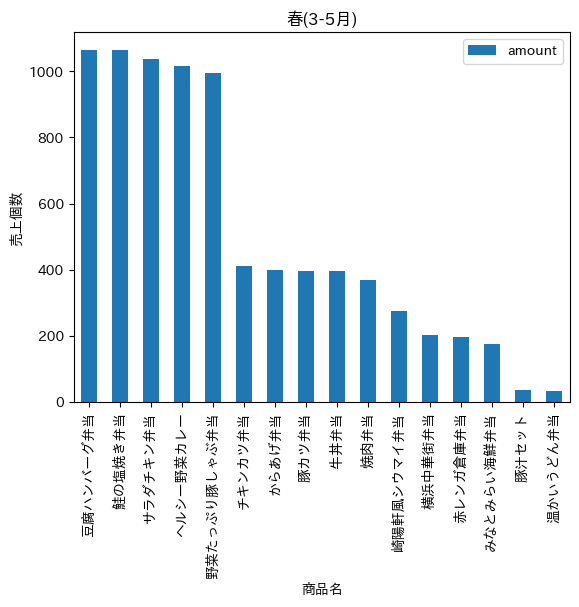

In [17]:
# 3-5月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .filter(pl.col('month').is_in([3, 4, 5]))
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount' ,descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )

plt.title('春(3-5月)')
plt.xlabel('商品名')
plt.ylabel('売上個数')

Text(0, 0.5, '売上個数')

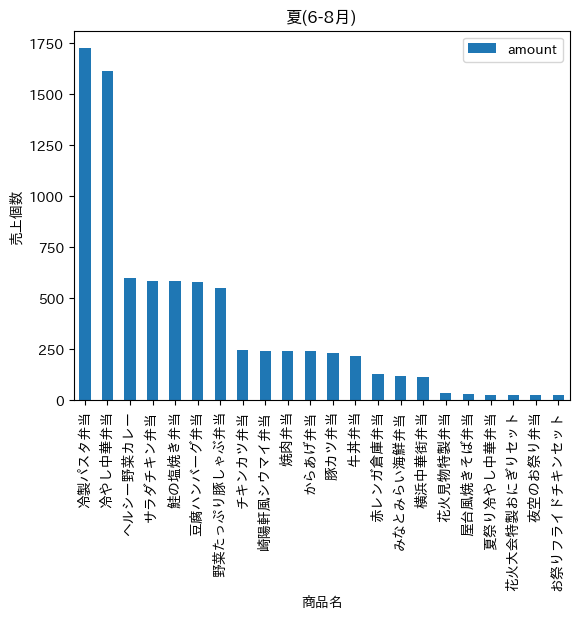

In [ ]:
# 6-8月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .filter(pl.col('month').is_in([6, 7, 8]))
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount' ,descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )

plt.title('夏(6-8月)')
plt.xlabel('商品名')
plt.ylabel('売上個数')


Text(0, 0.5, '売上個数')

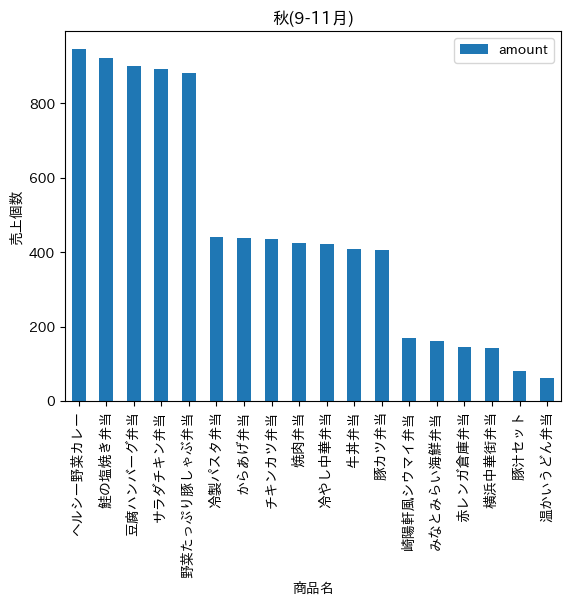

In [18]:
# 9-11月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .filter(pl.col('month').is_in([9, 10, 11]))
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount' ,descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )

plt.title('秋(9-11月)')
plt.xlabel('商品名')
plt.ylabel('売上個数')


Text(0, 0.5, '売上個数')

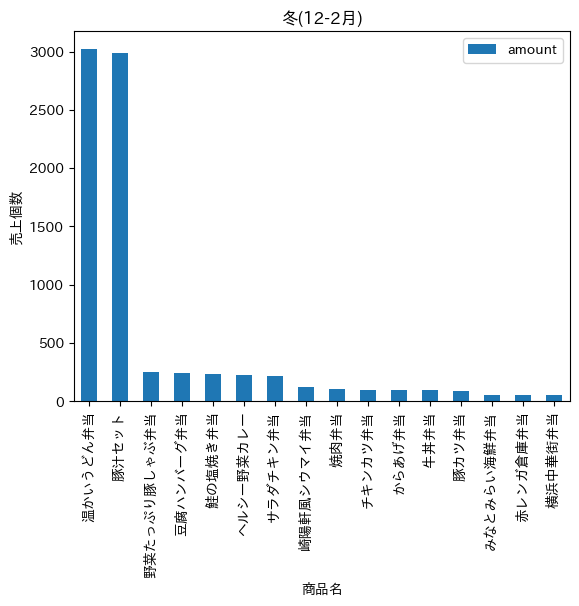

In [19]:
# 12-2月
(df_pos
 .with_columns(
     (pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M"))
     .dt.month()
     .alias('month')
    )
 .filter(pl.col('month').is_in([12, 1, 2]))
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount' ,descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )

plt.title('冬(12-2月)')
plt.xlabel('商品名')
plt.ylabel('売上個数')


### 顧客の分布

Text(0, 0.5, '人数')

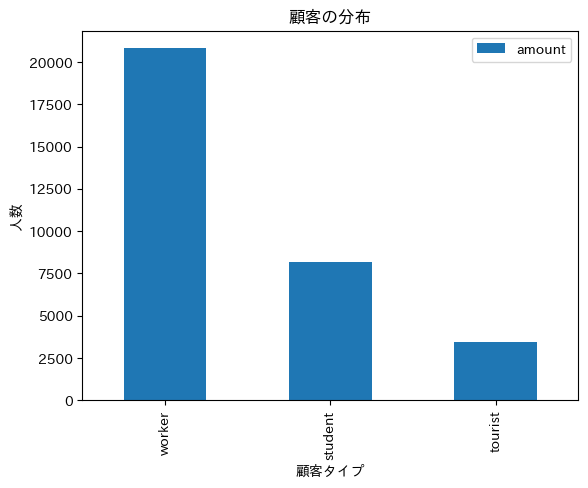

In [54]:
(df_pos
 .group_by('customer_type')
 .agg(pl.col('amount').count())
 .sort('amount',descending=True)
 .to_pandas()
 .plot(kind='bar', x='customer_type', y='amount')
)

plt.title('顧客の分布')
plt.xlabel('顧客タイプ')
plt.ylabel('人数')


### 支払い方法の分布

In [66]:
(df_pos
 .group_by('payment_method')
 .agg(pl.col('amount').count())
)

payment_method,amount
str,u32
"""カード""",10768
"""現金""",10856
"""電子マネー""",10835


Text(0, 0.5, '人数')

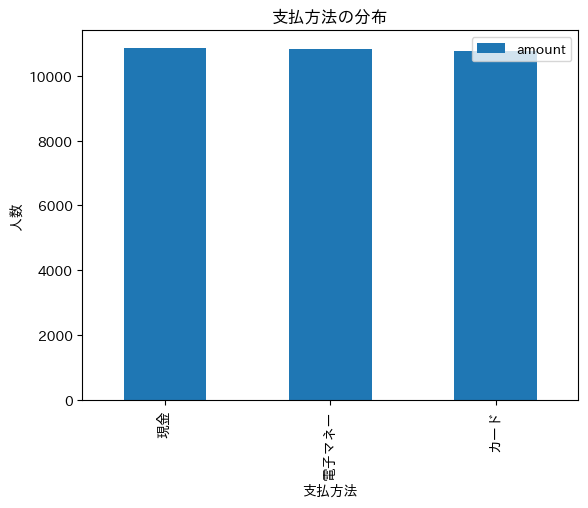

In [65]:
(df_pos
 .group_by('payment_method')
 .agg(pl.col('amount').count())
 .sort('amount',descending=True)
 .to_pandas()
 .plot(kind='bar', x='payment_method', y='amount')
)

plt.title('支払方法の分布')
plt.xlabel('支払方法')
plt.ylabel('人数')


### 顧客タイプごとの支払い方法

Text(0, 0.5, '支払い回数')

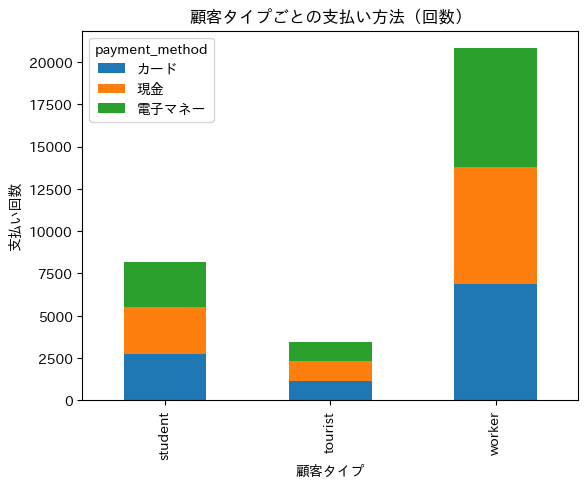

In [60]:
(df_pos
 .to_pandas()
 .pivot_table(
        index='customer_type',       # 行にする列
        columns='payment_method',    # 列にする列
        aggfunc='size',              # 件数をカウント
    )
 .plot(kind='bar', stacked=True)
)

plt.title('顧客タイプごとの支払い方法（回数）')
plt.xlabel('顧客タイプ')
plt.ylabel('支払い回数')

# .pivot_table ??

